# Neural Networks for Abalone Dataset in Biology
We use "abalone", a biological dataset. The target feature is Rings: integer variable representing the age of the abalone (the number of rings on the shell). The goal of the dataset is to predict the age of the abalone (i.e., the number of rings) based on its physical characteristics. 

Models used:

<ol start="1">
<li>Model 1: three dense layers</li>
<li>Model 2: </li>
<li>Model 3: 
  <ul style="list-style-type: decimal;">
    <li>...</li>
    <li>...</li>
  </ul>
<li>model 4:</li>
</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from utils import nn_model1, nn_model2, nn_model3, nn_model4, helper

## 1. EDA (Reading, Cleaning and Inspecting Data)

In [4]:
df = pd.read_csv('abalone.csv')

In [6]:
df = df.dropna()

In [8]:
display(df)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [10]:
df.describe()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
# we drop the first column w non-numerical values
df = df.drop(columns='Type')
df

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 2. Splitting Data

In [15]:
X = df.drop(columns='Rings')
y = df['Rings']
print(X)
print(y)

      LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0            0.455     0.365   0.095       0.5140         0.2245   
1            0.350     0.265   0.090       0.2255         0.0995   
2            0.530     0.420   0.135       0.6770         0.2565   
3            0.440     0.365   0.125       0.5160         0.2155   
4            0.330     0.255   0.080       0.2050         0.0895   
...            ...       ...     ...          ...            ...   
4172         0.565     0.450   0.165       0.8870         0.3700   
4173         0.590     0.440   0.135       0.9660         0.4390   
4174         0.600     0.475   0.205       1.1760         0.5255   
4175         0.625     0.485   0.150       1.0945         0.5310   
4176         0.710     0.555   0.195       1.9485         0.9455   

      VisceraWeight  ShellWeight  
0            0.1010       0.1500  
1            0.0485       0.0700  
2            0.1415       0.2100  
3            0.1140       0.1550  
4       

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

# 3. Training with Neural Network Models

## 3.1. Model 1: only w three dense layers

In [21]:
model1 = nn_model1.NeuralNetworkModel1(input_shape=7)
model1.compile_model1()
model1.summary1()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,857 (101.00 KB)

 Trainable params: 25,857 (101.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Fitting with Earlystopping to avoid over/underfitting:

early_stopping = callbacks.EarlyStopping(
    monitor = "val_loss",
    mode = "auto",
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)


history1 = model1.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256,
    callbacks=[early_stopping],
    verbose=0 #turns off training log
)

min validation loss: 0.03237375617027283


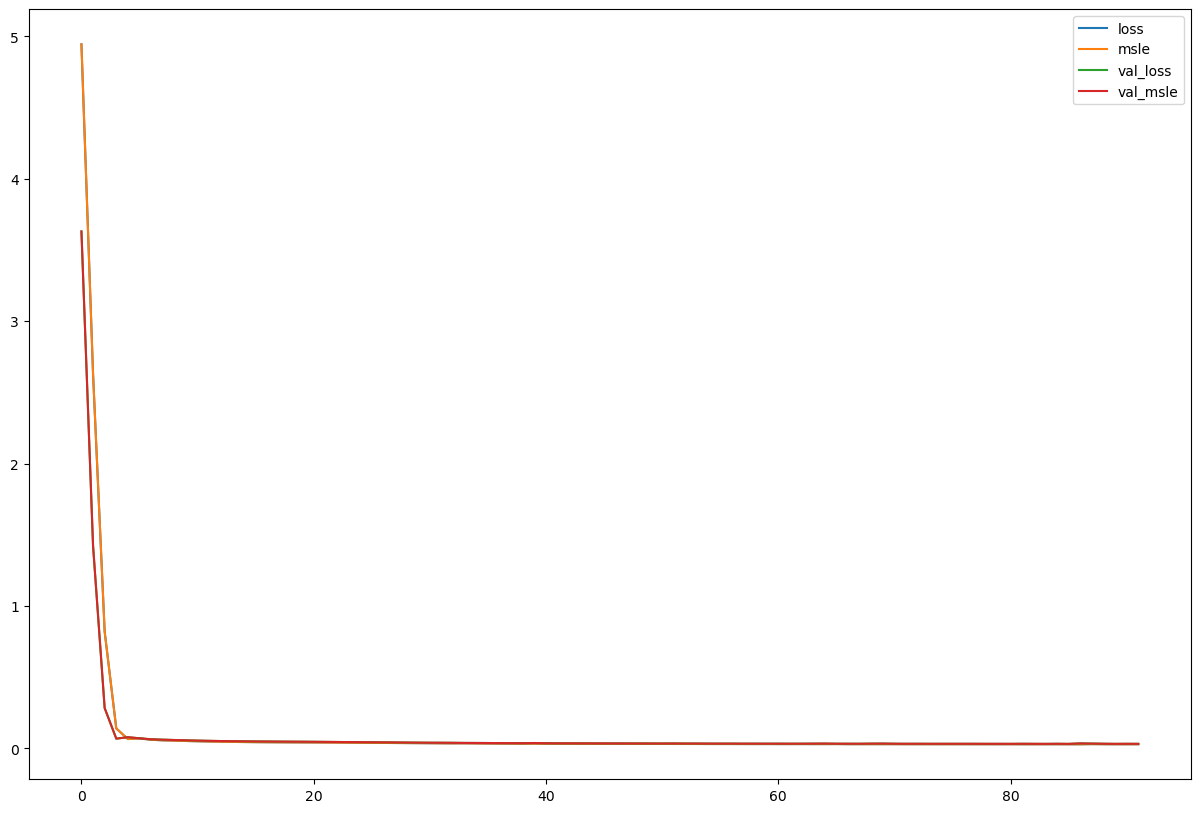

In [24]:
history_df1 = pd.DataFrame(history1.history)
history_df1.plot(figsize=(15,10))
print("min validation loss: {}".format(history_df1['val_loss'].min()))

## 3.2. Model 2: only with dense layers of depth twice model1

In [28]:
model2 = nn_model2.NeuralNetworkModel2(input_shape=7)
model2.compile_model2()
model2.summary2()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 512)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,921 (2.02 MB)

 Trainable params: 529,921 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Fitting with Earlystopping to avoid over/underfitting:

early_stopping = callbacks.EarlyStopping(
    monitor = "val_loss",
    mode = "auto",
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)


history2 = model2.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256,
    callbacks=[early_stopping],
    verbose=0 #turns off training log
)

min validation loss: 0.031233295798301697


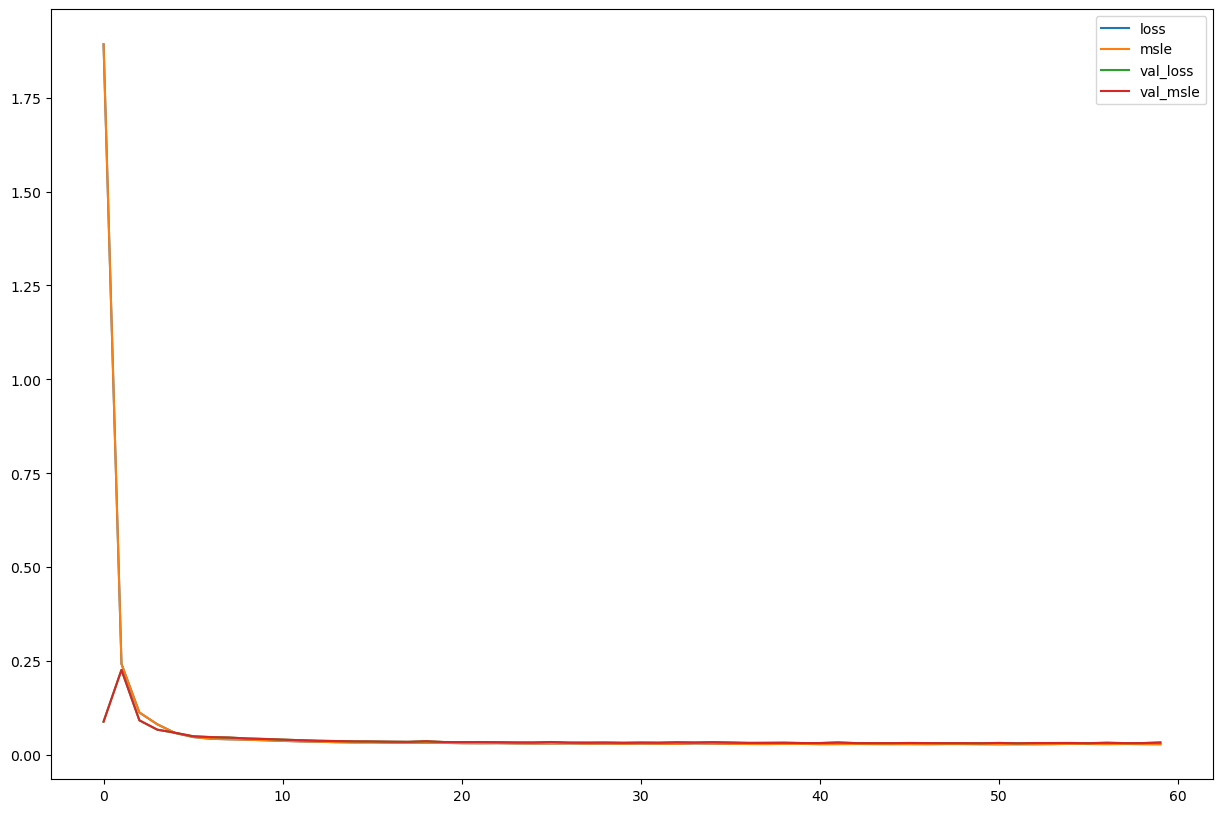

In [32]:
history_df2 = pd.DataFrame(history2.history)
history_df2.plot(figsize=(15,10))
print("min validation loss: {}".format(history_df2['val_loss'].min()))

## 3.2. Model 3: with dense layers of depth twice model1, and Dropout and Normalisation after each dense layer

In [19]:
model3 = nn_model3.NeuralNetworkModel3(input_shape=7)
model3.compile_model3()
model3.summary3()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1024)           │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,170,305 (12.09 MB)

 Trainable params: 3,164,161 (12.07 MB)

 Non-trainable params: 6,144 (24.00 KB)

In [21]:
# Fitting with Earlystopping to avoid over/underfitting:

early_stopping = callbacks.EarlyStopping(
    monitor = "val_loss",
    mode = "auto",
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)


history3 = model3.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256,
    callbacks=[early_stopping],
    verbose=0 #turns off training log
)

min validation loss: 0.05016452446579933


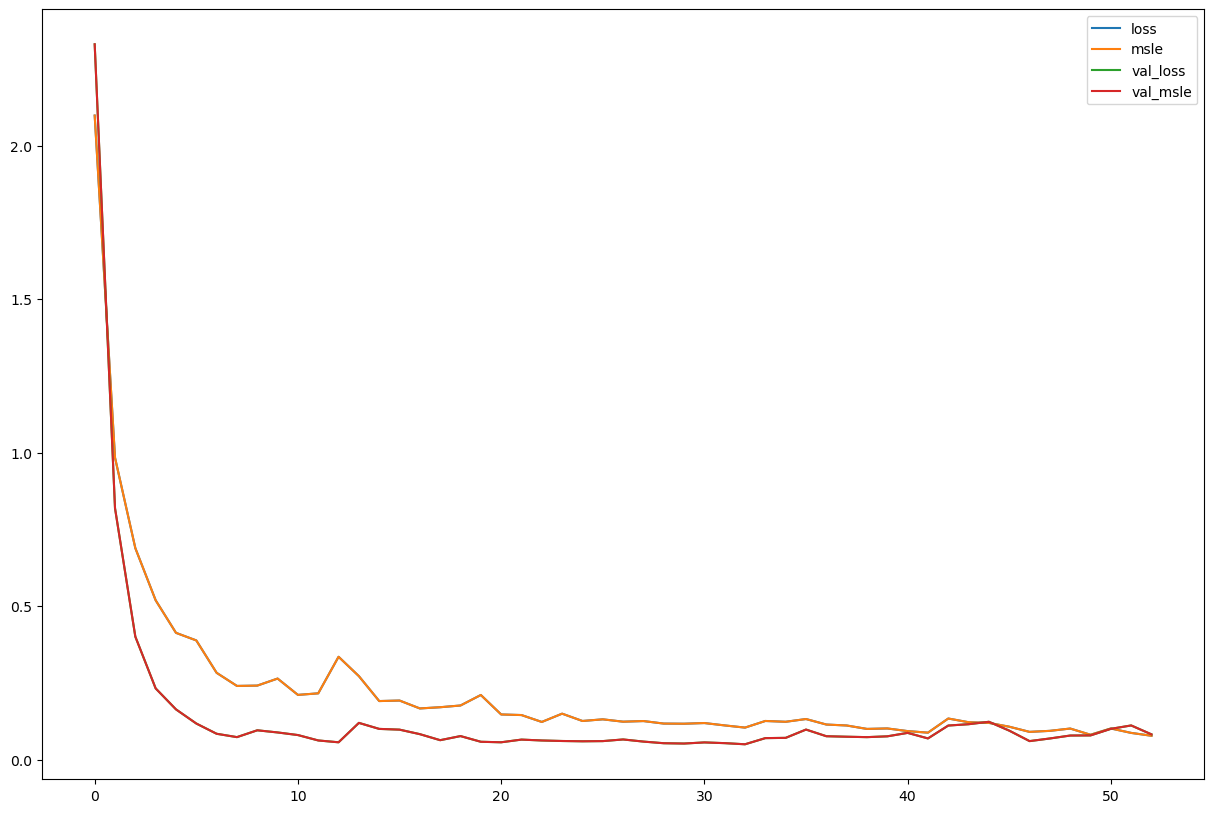

In [23]:
history_df3 = pd.DataFrame(history3.history)
history_df3.plot(figsize=(15,10))
print("min validation loss: {}".format(history_df3['val_loss'].min()))